In [1]:
# to make plot interactive 
#%matplotlib
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import pandas as pd
import imageio as iio
import os, shutil
from pathlib import Path

In [2]:
#clear temp folder
folder = 'images/temp'
for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

FileNotFoundError: [Errno 2] No such file or directory: 'images/temp'

In [3]:
df = pd.read_csv('data.csv')
print(df.columns)

number = 6*3*6
numberoftrials = 50
remembernstims = 7

print(df.dataoutput.iloc[1*number:(1*number)+remembernstims].tolist())

Index(['datatime', 'dataphase', 'datafrequency', 'datapulseduration',
       'dataoutput', 'modelphase', 'modelfrequency', 'modelpulseduration',
       'modelmew', 'modelsd', 'beta', 'phase_m', 'phase_a', 'phase_b',
       'freq_a', 'freq_b', 'freq_s', 'pw_a', 'pw_b', 'pw_s', 'Unnamed: 20'],
      dtype='object')
[-0.512772, -0.000567, 0.428319, -0.307616, -0.128158, -0.335111, -0.097067]


In [11]:
print(df)

      datatime  dataphase  datafrequency  datapulseduration  dataoutput  \
0          0.0   1.256000     104.000000         200.000000   -0.304133   
1          1.0   2.729141     147.867256         276.656955   -0.000567   
2          1.0   5.523231      85.307599         341.377317    0.428319   
3          1.0   0.248160     152.026937         294.785188   -0.307616   
4          1.0   3.329716      86.756533         386.586518   -0.128158   
...        ...        ...            ...                ...         ...   
5395       NaN        NaN            NaN                NaN         NaN   
5396       NaN        NaN            NaN                NaN         NaN   
5397       NaN        NaN            NaN                NaN         NaN   
5398       NaN        NaN            NaN                NaN         NaN   
5399       NaN        NaN            NaN                NaN         NaN   

      modelphase  modelfrequency  modelpulseduration  modelmew    modelsd  \
0           0.00      

In [4]:
def three_plots_2d_both(modelphase, modelfreq, modelpulse, modelmew,modelphase2, modelfreq2, modelpulse2, modelmew2,
                        it, true_func_phase, true_func_freq, true_func_pulse, phase_range, freq_range, pulse_range):

    fig = plt.figure(figsize = [9,3])
    gs = fig.add_gridspec(1, 3)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    fig.suptitle("Objective Function, Before Step Change")#"2D tremor severity model, iteration "+str(i))
    

    #ax1.scatter(modelphase,modelmew, c = 'blue', label = 'Model mean')
    #ax2.scatter(modelfreq,modelmew,c = 'blue')
    #ax3.scatter(modelpulse,modelmew,c = 'blue')
    ax1.plot(phase_range,true_func_phase, c = 'orange', label = 'True function')
    ax1.set_ylim(-1,1)
    ax2.plot(freq_range,true_func_freq,c = 'orange')
    ax3.plot(pulse_range,true_func_pulse,c = 'orange')
    #ax1.scatter(modelphase2,modelmew2,marker = 'x', s = 80, c='red', label = 'Stim results')
    #ax2.scatter(modelfreq2,modelmew2, s = 80, marker = 'x', c='red')
    #ax3.scatter(modelpulse2,modelmew2,marker = 'x', s = 80, c='red')
    fig.tight_layout(pad = 1.7)
    ax1.set_xlabel('Phase Rad')
    ax1.set_ylabel('Change in Tremor Severity')
    ax2.set_xlabel('Frequency Hz')
    ax2.set_ylabel('Stimulation Effect Modulation')
    ax3.set_xlabel('Pulse Width μS')
    ax3.set_ylabel('Stimulation Effect Modulation')
    #ax1.legend()
    bigit = it +1000
    plt.savefig('images/temp/'+str(bigit)+'.png')

    #plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'images/temp/1000.png'

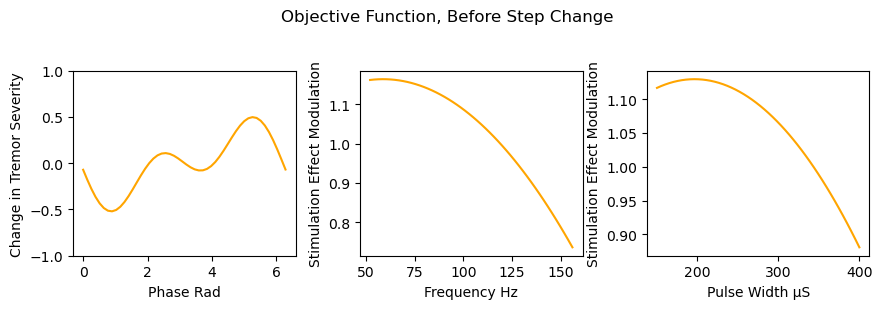

In [5]:
mphmin = np.zeros(numberoftrials)
mfmin = np.zeros(numberoftrials)
mpumin = np.zeros(numberoftrials)
modelmin = np.zeros(numberoftrials)
dphnew = np.zeros(numberoftrials)
dfnew = np.zeros(numberoftrials)
dpunew = np.zeros(numberoftrials)
datanew = np.zeros(numberoftrials)
beta = np.zeros(numberoftrials)
pm = np.zeros(numberoftrials)
pa = np.zeros(numberoftrials)
pb = np.zeros(numberoftrials)
fa = np.zeros(numberoftrials)
fb = np.zeros(numberoftrials)
fs = np.zeros(numberoftrials)
pwa = np.zeros(numberoftrials)
pwb = np.zeros(numberoftrials)
pws = np.zeros(numberoftrials)
true_min_phase = np.zeros(numberoftrials)
true_min_freq = np.zeros(numberoftrials)
true_min_pulse = np.zeros(numberoftrials)
true_min_overall = np.zeros(numberoftrials)


phase_range = np.linspace(0, 2*3.14, num=50)
freq_range = np.linspace(52, 156, num=50)
pulse_range = np.linspace(150, 400, num=50)


for i in range(numberoftrials):
    modelphase = df.modelphase.iloc[i*number:(1+i)*number].tolist()
    modelfreq = df.modelfrequency.iloc[i*number:(1+i)*number].tolist()
    modelpulse = df.modelpulseduration.iloc[i*number:(1+i)*number].tolist()
    modelmew = df.modelmew.iloc[i*number:(1+i)*number].tolist()
    dataphase = df.dataphase.iloc[i*number:(i*number)+remembernstims].tolist()
    datafreq = df.datafrequency.iloc[i*number:(i*number)+remembernstims].tolist()
    datapulse = df.datapulseduration.iloc[i*number:(i*number)+remembernstims].tolist()
    dataoutput = df.dataoutput.iloc[i*number:(i*number)+remembernstims].tolist()
    datatime = df.datatime.iloc[i*number:(i*number)+remembernstims].tolist()
    n = np.argmin(modelmew)
    mphmin[i] = modelphase[n]
    mfmin[i] = modelfreq[n]
    mpumin[i] = modelpulse[n]
    modelmin[i] = modelmew[n]
    m = np.argmin(datatime)
    dphnew[i] = dataphase[m]
    dfnew[i] = datafreq[m]
    dpunew[i] = datapulse[m]
    datanew[i] = dataoutput[m]
    beta[i] =  df.beta.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    pm[i] = df.phase_m.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    pa[i] = df.phase_a.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    pb[i] = df.phase_b.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    fa[i] = df.freq_a.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    fb[i] = df.freq_b.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    fs[i] = df.freq_s.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    pwa[i] = df.pw_a.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    pwb[i] = df.pw_b.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    pws[i] = df.pw_s.iloc[i*number:(i*number)+remembernstims].tolist()[m]
    


#    true_func_phase = pm[i]*(pa[i]*sin(5.25+pb[i]))+((1-pa[i])*sin(2*5.25+pb[i]))
#    true_func_freq = (1+fa[i]-(fb[i]*(156-fs[i])*(156-fs[i])))
#    true_func_pulse = (1+pwa[i]-(pwb[i]*(250-pws[i])*(250-pws[i])))
    true_func_phase = pm[i]*((pa[i]*sin(phase_range+pb[i]))+((1-pa[i])*sin((2*phase_range)+pb[i])))
    true_func_freq = (1+fa[i]-(fb[i]*(freq_range-fs[i])*(freq_range-fs[i])))
    true_func_pulse = (1+pwa[i]-(pwb[i]*(pulse_range-pws[i])*(pulse_range-pws[i])))
    

    
    true_min_phase[i] = phase_range[np.argmin(true_func_phase)]
    true_min_freq[i] = freq_range[np.argmax(true_func_freq)]
    true_min_pulse[i] = pulse_range[np.argmax(true_func_pulse)]
    true_min_overall[i] = np.min(true_func_phase)*np.max(true_func_freq)*np.max(true_func_pulse)
    
    
    #graphmodel(modelphase, modelvoltage, modelpulse, modelmew)
    three_plots_2d_both(modelphase, modelfreq, modelpulse, modelmew,dataphase, datafreq, datapulse, dataoutput,i,
                         true_func_phase, true_func_freq, true_func_pulse, phase_range, freq_range, pulse_range)



In [6]:
images = list()
for file in Path("images/temp").iterdir():
    if not file.is_file():
        continue
    images.append(iio.imread(file))
iio.mimsave('images/gif/step1to4.gif', images, duration = 0.2)

FileNotFoundError: [Errno 2] No such file or directory: 'images/temp'

In [7]:
minimumevolution = pd.DataFrame({'Data Phase': dphnew,'Data Frequency':dfnew,'Data Pulse duration':dpunew,'New stim':datanew,
    'Model Phase': mphmin,'Model Frequency':mfmin,'Model Pulse duration':mpumin,'Minimum change in tremor intenisty':modelmin,
                                'beta': beta, 'phasemin':true_min_phase, 'freqmin':true_min_freq,
                                'pulsemin':true_min_pulse, 'truemin':true_min_overall})
pd.set_option('display.max_rows', minimumevolution.shape[0]+1)
#minimumevolution



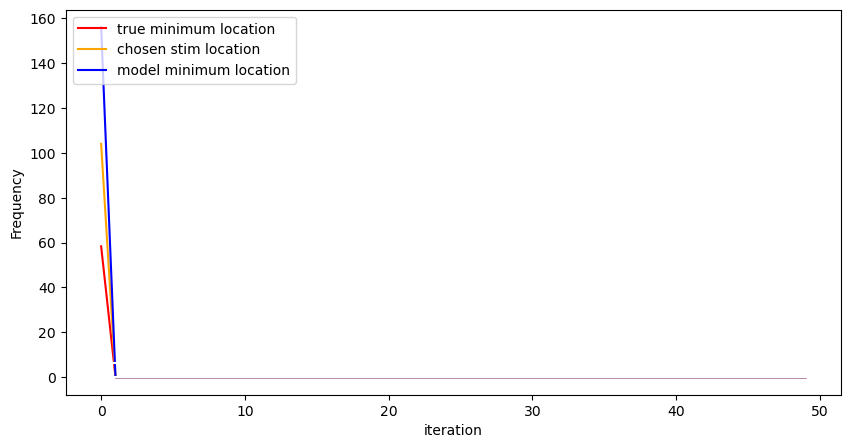

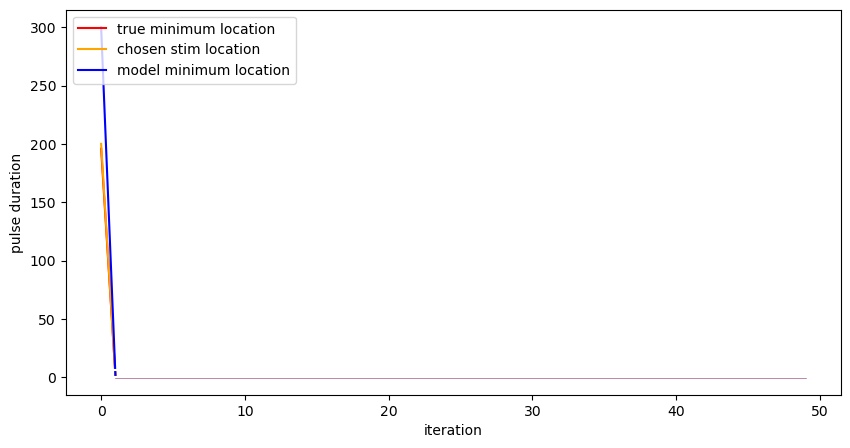

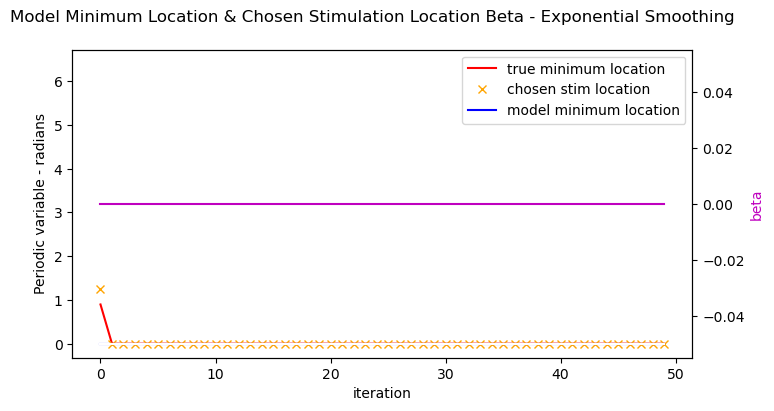

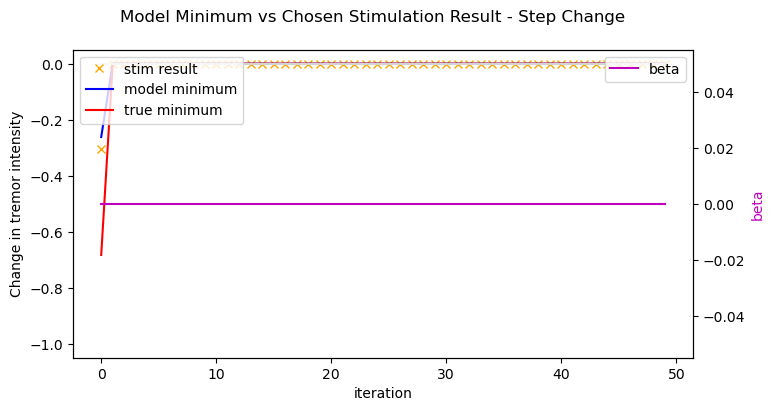

In [8]:
fig = plt.figure(figsize = [10,5])
ax = fig.add_subplot()
ax.plot(minimumevolution.index, minimumevolution['freqmin'], c = 'r', label = 'true minimum location')
ax.plot(minimumevolution.index, minimumevolution['Data Frequency'], c = 'orange', label = 'chosen stim location')
ax.plot(minimumevolution.index, minimumevolution['Model Frequency'], c = 'b', label = 'model minimum location')
ax.plot(minimumevolution.index, np.ones(numberoftrials)*0, c = 'white')
ax.plot(minimumevolution.index, np.ones(numberoftrials)*6.4, c = 'white')
ax.set_xlabel('iteration')
ax.set_ylabel('Frequency')
ax.legend(loc = 'upper left')
plt.show()

fig = plt.figure(figsize = [10,5])
ax = fig.add_subplot()
ax.plot(minimumevolution.index, minimumevolution['pulsemin'], c = 'r', label = 'true minimum location')
ax.plot(minimumevolution.index, minimumevolution['Data Pulse duration'], c = 'orange', label = 'chosen stim location')
ax.plot(minimumevolution.index, minimumevolution['Model Pulse duration'], c = 'b', label = 'model minimum location')
ax.plot(minimumevolution.index, np.ones(numberoftrials)*0, c = 'white')
ax.plot(minimumevolution.index, np.ones(numberoftrials)*6.4, c = 'white')
ax.set_xlabel('iteration')
ax.set_ylabel('pulse duration')
ax.legend(loc = 'upper left')
plt.show()

fig = plt.figure(figsize = [8,4])
ax = fig.add_subplot()
ax2 = ax.twinx()
fig.suptitle("Model Minimum Location & Chosen Stimulation Location Beta - Exponential Smoothing")
ax.plot(minimumevolution.index, minimumevolution['phasemin'], c = 'r', label = 'true minimum location')
ax.plot(minimumevolution.index, minimumevolution['Data Phase'], c = 'orange', marker = 'x', linestyle='None', label = 'chosen stim location')
#ax.plot(minimumevolution.index, minimumevolution['Data Phase'], c = 'orange', label = 'chosen stim location')
ax.plot(minimumevolution.index, minimumevolution['Model Phase'], c = 'b', label = 'model minimum location')
ax.plot(minimumevolution.index, np.ones(numberoftrials)*0, c = 'white')
ax.plot(minimumevolution.index, np.ones(numberoftrials)*6.4, c = 'white')
ax2.plot(minimumevolution.index, minimumevolution['beta'], c = 'm', label = 'beta')
ax.set_xlabel('iteration')
ax.set_ylabel('Periodic variable - radians')
ax2.set_ylabel('beta', color='m')
ax.legend(loc = 'upper right')
#ax2.legend(loc = 'upper right')
plt.show()

fig = plt.figure(figsize = [8,4])
ax = fig.add_subplot()
ax2 = ax.twinx()
fig.suptitle("Model Minimum vs Chosen Stimulation Result - Step Change")
#ax.plot(minimumevolution.index, minimumevolution['New stim'], c = 'orange', label = 'stim result')
ax.plot(minimumevolution.index, minimumevolution['New stim'], c = 'orange', marker = 'x', linestyle='None', label = 'stim result')
ax.plot(minimumevolution.index, minimumevolution['Minimum change in tremor intenisty'], c = 'b', label = 'model minimum')
ax.plot(minimumevolution.index, minimumevolution['truemin'], c = 'red', label = 'true minimum')

ax.plot(minimumevolution.index, np.zeros(numberoftrials), c = 'lightgrey')
ax.plot(minimumevolution.index, np.ones(numberoftrials)*-1, c = 'white')
ax2.plot(minimumevolution.index, minimumevolution['beta'], c = 'm', label = 'beta')
ax.set_xlabel('iteration')
ax.set_ylabel('Change in tremor intensity')
ax2.set_ylabel('beta', color='m')
ax.legend(loc = 'upper left')
ax2.legend(loc = 'upper right')
plt.show()

In [9]:
stim_results = minimumevolution['New stim'].to_numpy()
true_minimums = minimumevolution['truemin'].to_numpy()
#stim_results = abs(stim_results-true_minimums)#/abs(mean(true_minimums))
np.mean(true_minimums)


-0.5848376898233109

In [10]:
np.mean(stim_results)

-0.26441152

mean(minimumevolution['New stim'].to_numpy()[25:-1])

true_minimums[0]

minimumevolution['truemin'].to_csv('csvs/true.csv')  

minimumevolution['New stim'].to_csv('csvs/alg.csv')  

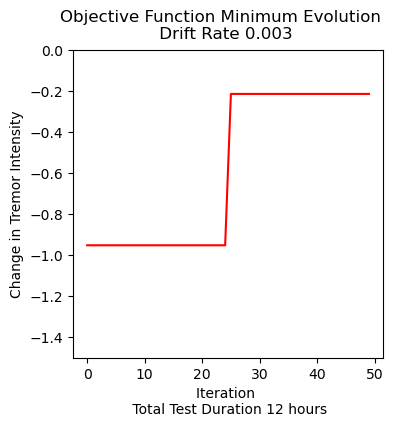

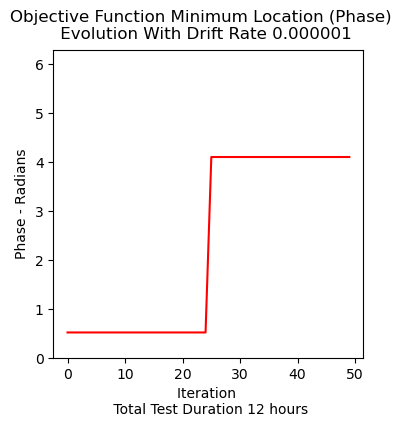

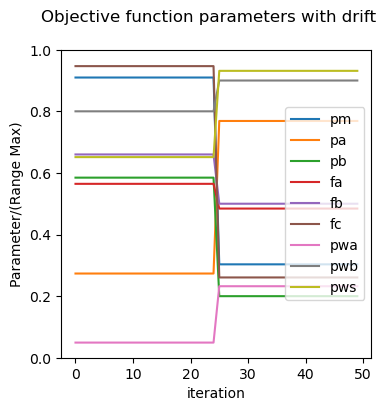

In [11]:
fig = plt.figure(figsize = [4,4])
ax = fig.add_subplot()
fig.suptitle("Objective Function Minimum Evolution \n Drift Rate 0.003")
ax.plot(minimumevolution.index, minimumevolution['truemin'], c = 'red', label = 'true minimum')
ax.set_xlabel('Iteration \n Total Test Duration 12 hours')
ax.set_ylabel('Change in Tremor Intensity')
ax.set_ylim(-1.5,0)
plt.show()

fig = plt.figure(figsize = [4,4])
ax = fig.add_subplot()
fig.suptitle("Objective Function Minimum Location (Phase) \n Evolution With Drift Rate 0.000001")
ax.plot(minimumevolution.index, minimumevolution['phasemin'], c = 'red', label = 'true minimum')
ax.set_xlabel('Iteration \n Total Test Duration 12 hours')
ax.set_ylabel('Phase - Radians')
ax.set_ylim(0,6.3)
plt.show()

fig = plt.figure(figsize = [4,4])
ax = fig.add_subplot()
fig.suptitle("Objective function parameters with drift ")
ax.plot(minimumevolution.index, pm/1, label = 'pm')
ax.plot(minimumevolution.index, pa/1, label = 'pa')
ax.plot(minimumevolution.index, pb/6.3, label = 'pb')
ax.plot(minimumevolution.index, fa/0.2, label = 'fa')
ax.plot(minimumevolution.index, fb/0.00005, label = 'fb')
ax.plot(minimumevolution.index, fs/200, label = 'fc')
ax.plot(minimumevolution.index, pwa/0.2, label = 'pwa')
ax.plot(minimumevolution.index, pwb/0.00001, label = 'pwb')
ax.plot(minimumevolution.index, pws/400, label = 'pws')
ax.set_xlabel('iteration')
ax.set_ylabel('Parameter/(Range Max)')
ax.legend(loc = 'right')
ax.set_ylim(0,1)
plt.show()